# Image Analysis V4.0 Captioning and Dense Captioning (public preview)

"Caption" replaces "Describe" in V4.0 as the significantly improved image captioning feature rich with details and sematic understanding. 

- Dense Captions provides more detail by generating one sentence descriptions of up to 10 regions of the image in addition to describing the whole image. 
- Dense Captions also returns bounding box coordinates of the described image regions. 
- There's also a new gender-neutral parameter to allow customers to choose whether to enable probabilistic gender inference for alt-text and Seeing AI applications. 
- Automatically deliver rich captions, accessible alt-text, SEO optimization, and intelligent photo curation to support digital content.

https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-describe-images-40?tabs=image

In [1]:
import cv2
import json
import datetime
import requests
import sys
import random
import urllib.request
import numpy as np
import ipyplot
import glob

from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [3]:
print("Today is", datetime.datetime.today())

Today is 2023-03-13 12:31:12.766584


In [4]:
endpoint = "https://yournendpoint/computervision/imageanalysis:analyze?api-version=2023-02-01-preview&features=denseCaptions&language=en"

headers = {
    'Content-type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'yourkey'
}

In [5]:
imageurl = 'https://github.com/retkowsky/images/blob/master/car%20on%20fire.jpg?raw=true'

r = requests.get(imageurl)
img = Image.open(BytesIO(r.content))
img

img.save("image1.jpg")

In [6]:
r = requests.post(endpoint,
                  data=json.dumps({'url': imageurl}),
                  headers=headers)

results = r.json()
results

{'denseCaptionsResult': {'values': [{'text': 'a fire truck and a car on fire',
    'confidence': 0.49368563294410706,
    'boundingBox': {'x': 0, 'y': 0, 'w': 1200, 'h': 602}},
   {'text': 'a fire truck on the road',
    'confidence': 0.5033637881278992,
    'boundingBox': {'x': 332, 'y': 322, 'w': 185, 'h': 114}},
   {'text': 'a car on fire with smoke coming out of the back',
    'confidence': 0.5253980755805969,
    'boundingBox': {'x': 670, 'y': 401, 'w': 187, 'h': 117}},
   {'text': 'a sign with an arrow pointing to the exit',
    'confidence': 0.46192827820777893,
    'boundingBox': {'x': 199, 'y': 301, 'w': 73, 'h': 64}},
   {'text': 'a green sign with a white arrow',
    'confidence': 0.5310959815979004,
    'boundingBox': {'x': 199, 'y': 300, 'w': 73, 'h': 152}},
   {'text': 'a car parked on the side of a road',
    'confidence': 0.49505606293678284,
    'boundingBox': {'x': 792, 'y': 244, 'w': 399, 'h': 349}},
   {'text': 'a person wearing a firefighter uniform',
    'confiden

In [7]:
main_caption = results['denseCaptionsResult']['values'][0]
main_caption

print("The main caption of the image is:",
      main_caption['text'],
      "with a confidence =", main_caption['confidence'])

The main caption of the image is: a fire truck and a car on fire with a confidence = 0.49368563294410706


In [8]:
print("\033[1;31;34mDense captions:\n")

for idx, value in enumerate(results['denseCaptionsResult']['values'], start=1):
    print(idx, value['text'], "=", round(value['confidence'], 3))

Dense captions:

1 a fire truck and a car on fire = 0.494
2 a fire truck on the road = 0.503
3 a car on fire with smoke coming out of the back = 0.525
4 a sign with an arrow pointing to the exit = 0.462
5 a green sign with a white arrow = 0.531
6 a car parked on the side of a road = 0.495
7 a person wearing a firefighter uniform = 0.374
8 a fire truck on the road = 0.511
9 firemen on the road with a fire truck = 0.309
10 a pole with a light on it = 0.37


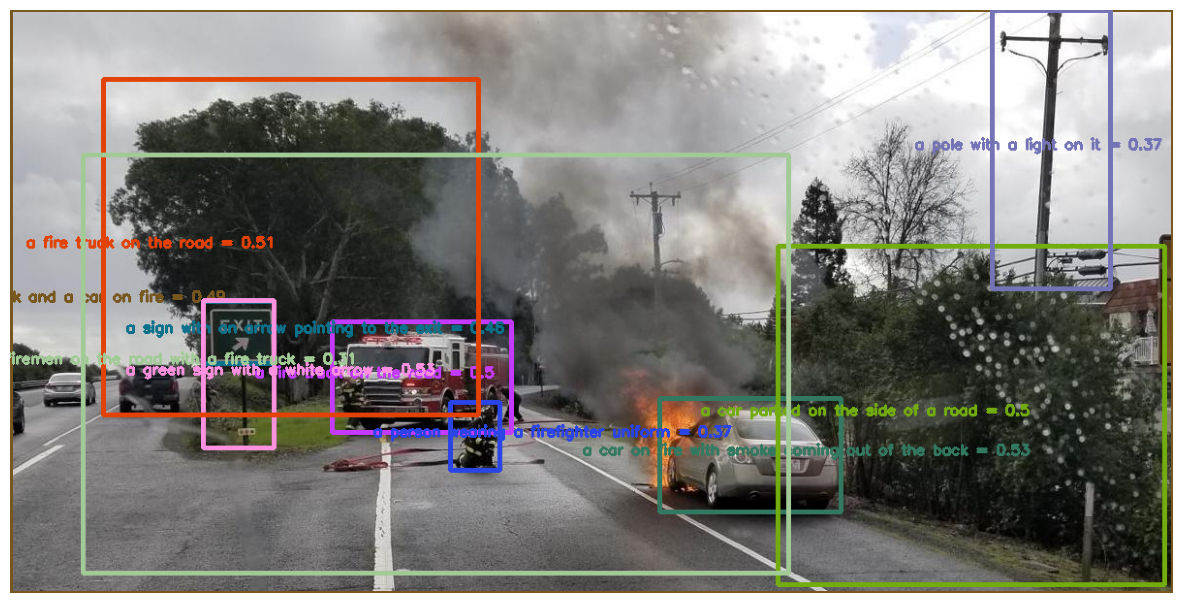

In [12]:
images = glob.glob('cropped_1_*.*')

for image in images:
    os.remove(image)

img = cv2.cvtColor(cv2.imread('image1.jpg'), cv2.COLOR_BGR2RGB)
imageCopy = img.copy()

for value in results['denseCaptionsResult']['values']:
    densecaption = value['text']
    confidence = value['confidence']
    x = value['boundingBox']['x']
    y = value['boundingBox']['y']
    w = value['boundingBox']['w']
    h = value['boundingBox']['h']

    caption = f"{densecaption} = {round(confidence, 2)}"
    color = list(np.random.random(size=3) * 256)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 3)
    cv2.putText(img, caption, (x-80, int((y + y + h) / 2)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    crop_img = imageCopy[y:y+h, x:x+w]
    cv2.imwrite("cropped_1_" + densecaption + '_' + str(confidence) +
                '.jpg', cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(15, 12))
plt.axis('off')
plt.imshow(img)

plt.savefig("dense_captions_1.jpg")

In [10]:
images = glob.glob('cropped_1_*.*')
labels = [image.split('/')[-1] for image in images]

ipyplot.plot_images(images, max_images=15, img_width=150)

In [11]:
ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=10, img_width=200)